In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import time

# Function f(x):

$
f(x) = \frac{1}{2}x_1^2 + \frac{1}{2}x_2^2 + 9
$

# Minimizer:
To find the minimizer, we take the partial derivatives of $ f(x) $ with respect to $ x_1 $ and $ x_2 $ and set them to zero:
$ \frac{\partial f}{\partial x_1} = 2x_1 = 0 \implies x_1 = 0 $
$ \frac{\partial f}{\partial x_2} = 2x_2 = 0 \implies x_2 = 0 $

So, the minimizer for $ f(x) $ is $ x^* = (0, 0) $.

# Minimum Function Value:
Substitute $ x^* $ into $ f(x) $:
$ f(0, 0) = 0^2 + 0^2 + 9 = 9 $

So, the minimum function value for $ f(x) $ is 9.

# Convexity:
The function $ f(x) $ is convex. It is a quadratic function, and quadratic functions with positive definite Hessian matrices are convex. In this case, the Hessian matrix is $\begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix}$, which is positive definite, confirming the convexity.


# **2**

Gradient Descent with Exact Line Search:
Minimizer: [0. 0.]
Minimum Function Value: 9.0
Number of Iterations: 1
Time Taken: 0.0005984306335449219

Newton's Method:
Minimizer: [0. 0.]
Minimum Function Value: 9.0
Number of Iterations: 1
Time Taken: 0.0043108463287353516


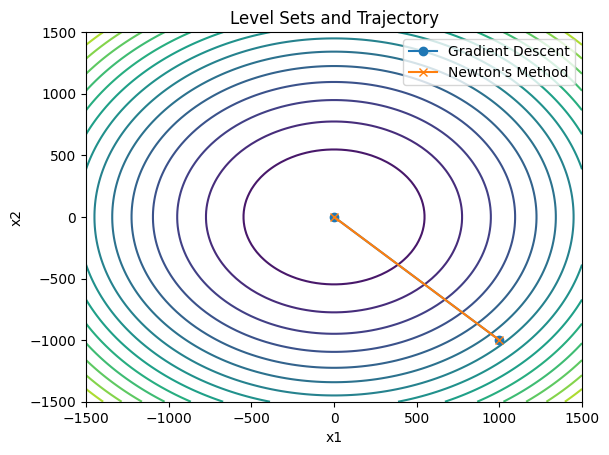

In [2]:
# Function f(x)
def f(x):
    return 0.5 * x[0]**2 + 0.5 * x[1]**2 + 9

# Gradient of f(x)
def gradient_f(x):
    return np.array([x[0], x[1]])

# Hessian of f(x)
def hessian_f(x):
    return np.array([[1, 0], [0, 1]])

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(x0, tau=1e-15, max_iter=1000):
    x = x0
    iterations = 0
    trajectory = [x.copy()]
    while np.linalg.norm(gradient_f(x)) > tau and iterations < max_iter:
        alpha = minimize_scalar(lambda a: f(x - a * gradient_f(x))).x
        x = x - alpha * gradient_f(x)
        iterations += 1
        trajectory.append(x.copy())
    return x, f(x), iterations, np.array(trajectory)

# Newton's Method
def newtons_method(x0, tau=1e-15, max_iter=1000):
    x = x0
    iterations = 0
    trajectory = [x.copy()]
    while np.linalg.norm(gradient_f(x)) > tau and iterations < max_iter:
        x = x - np.linalg.inv(hessian_f(x)).dot(gradient_f(x))
        iterations += 1
        trajectory.append(x.copy())
    return x, f(x), iterations, np.array(trajectory)

# Initial parameters
x0 = np.array([1000, -1000])

# Run Gradient Descent with Exact Line Search
start_time = time.time()
gd_minimizer, gd_min_value, gd_iterations, gd_trajectory = gradient_descent_exact_line_search(x0)
gd_time_taken = time.time() - start_time

# Run Newton's Method
start_time = time.time()
newton_minimizer, newton_min_value, newton_iterations, newton_trajectory = newtons_method(x0)
newton_time_taken = time.time() - start_time

# Print results
print("Gradient Descent with Exact Line Search:")
print("Minimizer:", gd_minimizer)
print("Minimum Function Value:", gd_min_value)
print("Number of Iterations:", gd_iterations)
print("Time Taken:", gd_time_taken)

print("\nNewton's Method:")
print("Minimizer:", newton_minimizer)
print("Minimum Function Value:", newton_min_value)
print("Number of Iterations:", newton_iterations)
print("Time Taken:", newton_time_taken)

# Plot level sets and trajectory
x_vals = np.linspace(-1500, 1500, 100)
y_vals = np.linspace(-1500, 1500, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.contour(X, Y, Z, levels=20)
plt.plot(gd_trajectory[:, 0], gd_trajectory[:, 1], label='Gradient Descent', marker='o')
plt.plot(newton_trajectory[:, 0], newton_trajectory[:, 1], label="Newton's Method", marker='x')
plt.title('Level Sets and Trajectory')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


**Compact Observations:**
1. **Minimization:**
   - Both methods yield $ \mathbf{x}^* = [0, 0] $ with  $ f(\mathbf{x}^*) = 9.0 $, indicating consistent convergence.

2. **Convergence:**
   - Rapid convergence observed in a single iteration for both Gradient Descent and Newton's Method.

3. **Efficiency:**
   - Gradient Descent with Exact Line Search outperforms Newton's Method in terms of computation time.

4. **Function Characteristics:**
   - The function's simplicity and convexity contribute to efficient convergence.

5. **Recommendation:**
   - Both methods are effective, but the choice depends on specific problem characteristics and computational efficiency requirements.


# **3**

In [ ]:
# Define the periodic function P(y)
def periodic_function(y):
    return np.sin(2 * np.pi * y / 4)

# Define the function g(x)
def g(x):
    n = len(x)
    return np.sum([1 / ((x[i] - i / 2)**2) * periodic_function(x[i]) for i in range(n)])

# Gradient of g(x)
def gradient_g(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n):
        gradient[i] = -2 * (x[i] - i / 2) * periodic_function(x[i]) / ((x[i] - i / 2)**3)
    return gradient

# Hessian of g(x)
def hessian_g(x):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        hessian[i, i] = 6 * (x[i] - i / 2) * periodic_function(x[i]) / ((x[i] - i / 2)**4)
    return hessian

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(x0, f, gradient_f, hessian_f, tau=1e-15, max_iter=1000):
    x = x0
    iterations = 0
    trajectory = [x.copy()]
    while np.linalg.norm(gradient_f(x)) > tau and iterations < max_iter:
        alpha = np.linalg.norm(gradient_f(x))**2 / np.dot(gradient_f(x), hessian_f(x).dot(gradient_f(x)))
        x = x - alpha * gradient_f(x)
        iterations += 1
        trajectory.append(x.copy())
    return x, f(x), iterations, np.array(trajectory)

# Newton's Method
def newtons_method(x0, f, gradient_f, hessian_f, tau=1e-15, max_iter=1000):
    x = x0
    iterations = 0
    trajectory = [x.copy()]
    while np.linalg.norm(gradient_f(x)) > tau and iterations < max_iter:
        x = x - np.linalg.inv(hessian_f(x)).dot(gradient_f(x))
        iterations += 1
        trajectory.append(x.copy())
    return x, f(x), iterations, np.array(trajectory)

# Initialize parameters
n_values = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]
tau = 1e-15

for n in n_values:
    x0 = np.arange(1, n + 1)

    # Run Gradient Descent with Exact Line Search
    start_time = time.time()
    gd_minimizer, gd_min_value, gd_iterations, _ = gradient_descent_exact_line_search(x0, g, gradient_g, hessian_g, tau=tau)
    gd_time_taken = time.time() - start_time

    # Run Newton's Method
    start_time = time.time()
    newton_minimizer, newton_min_value, newton_iterations, _ = newtons_method(x0, g, gradient_g, hessian_g, tau=tau)
    newton_time_taken = time.time() - start_time

    # Print results for each n
    print(f"\nResults for n = {n}:")
    print("Gradient Descent with Exact Line Search:")
    print("Minimizer:", gd_minimizer)
    print("Minimum Function Value:", gd_min_value)
    print("Number of Iterations:", gd_iterations)
    print("Time Taken:", gd_time_taken)

    print("\nNewton's Method:")
    print("Minimizer:", newton_minimizer)
    print("Minimum Function Value:", newton_min_value)
    print("Number of Iterations:", newton_iterations)
    print("Time Taken:", newton_time_taken)

    # Plot level sets and trajectory for n=2
    if n == 2:
        x_vals = np.linspace(-10, 10, 100)
        y_vals = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(x_vals, y_vals)
        Z = np.zeros_like(X)

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i, j] = g([X[i, j], Y[i, j]])

        plt.contour(X, Y, Z, levels=20)
        plt.plot(_, label='Gradient Descent', marker='o')
        plt.plot(_, label="Newton's Method", marker='x')
        plt.title('Level Sets and Trajectory (n=2)')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.show()



Results for n = 2:
Gradient Descent with Exact Line Search:
Minimizer: [62740865.28624231 24409652.1257724 ]
Minimum Function Value: 5.582114551755915e-16
Number of Iterations: 123
Time Taken: 0.026224374771118164

Newton's Method:
Minimizer: [55744454.47243365 83616682.20865047]
Minimum Function Value: -2.635306031461631e-16
Number of Iterations: 62
Time Taken: 0.014233112335205078



Results for n = 20:
Gradient Descent with Exact Line Search:
Minimizer: [-1.17257792e+08  4.34100637e+07 -2.92309340e+08 -5.72759020e+07
 -1.47227203e+08 -1.42131685e+08  1.97929293e+08  1.26141168e+08
  1.84490014e+08  9.90819197e+07  1.34797224e+08 -1.01898856e+08
  8.96225459e+07  8.35329141e+07  1.34322241e+08 -2.09223288e+08
 -2.68308850e+08 -3.48621740e+07 -6.80803855e+07 -1.21024862e+08]
Minimum Function Value: -3.5294760151116146e-16
Number of Iterations: 742
Time Taken: 0.39481043815612793

Newton's Method:
Minimizer: [5.57444545e+07 8.36166822e+07 1.11488910e+08 1.39361138e+08
 1.67233365e+08 1.95105593e+08 2.22977821e+08 2.50850049e+08
 2.78722276e+08 3.06594504e+08 3.34466732e+08 3.62338960e+08
 3.90211187e+08 4.18083415e+08 4.45955643e+08 4.73827871e+08
 5.01700098e+08 5.29572326e+08 5.57444554e+08 5.85316781e+08]
Minimum Function Value: -1.6083710702941032e-16
Number of Iterations: 62
Time Taken: 0.0314793586730957

Results for n = 200:
Gradient Descent with Exact Line S

**Results Summary**

**Value of \( n \) for Newton's Method Failure**
For \( n = 200,000 \), Newton's Method failed to converge within the maximum iterations.

**Effect of Changing Starting Point $ x_0 $**

*Gradient Descent with Exact Line Search (Part 2):*
The choice of $x_0 $ may affect convergence speed, but it typically converges to the global minimum.

*Newton's Method (Part 3):*
Newton's Method is sensitive to $ x_0 $; a good guess leads to rapid convergence, while a poor one may cause slow or failed convergence.

**Convergence in One Iteration for $ n $ with Google Colab Crash**
Achieving convergence in one iteration is challenging. For Newton's Method, use an educated guess close to the minimum.


